In [43]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [44]:
wine = pd.read_csv('/Users/justinsmith/Documents/GitHub/wine.csv', header=-1)

In [45]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [46]:
c_names = ['target', 'alcohol', 'malic acid', 'ash', 'alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins','color intensity', 'hue', 'od280/od315', 'proline']
wine.columns = c_names

In [47]:
wine.head()

,target,alcohol,malic acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
from sklearn import tree
import time

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

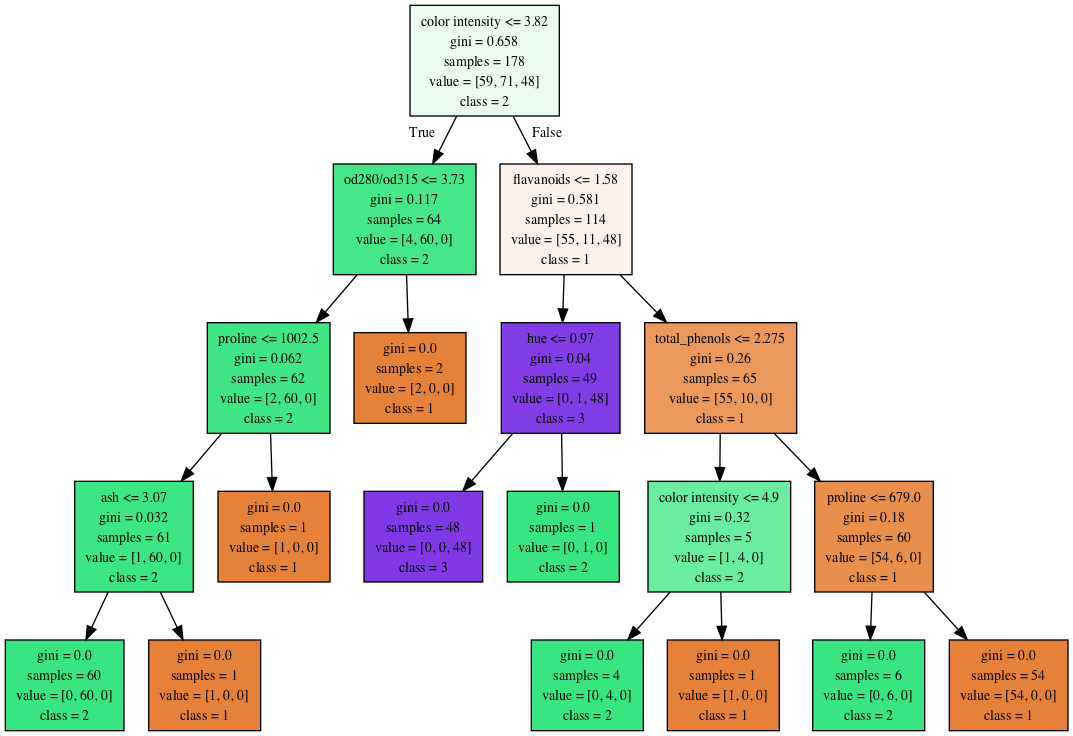

In [82]:
wine_class = wine.target
wine_features = wine.drop(columns='target')

decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=6,
    max_depth=6,
    random_state = 1337
)
decision_tree.fit(wine_features, wine_class)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=wine_features.columns,
    class_names=['1', '2', '3'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [86]:
start_time = time.time()
print('time 1:', time.time() - start_time)

time 1: 4.887580871582031e-05


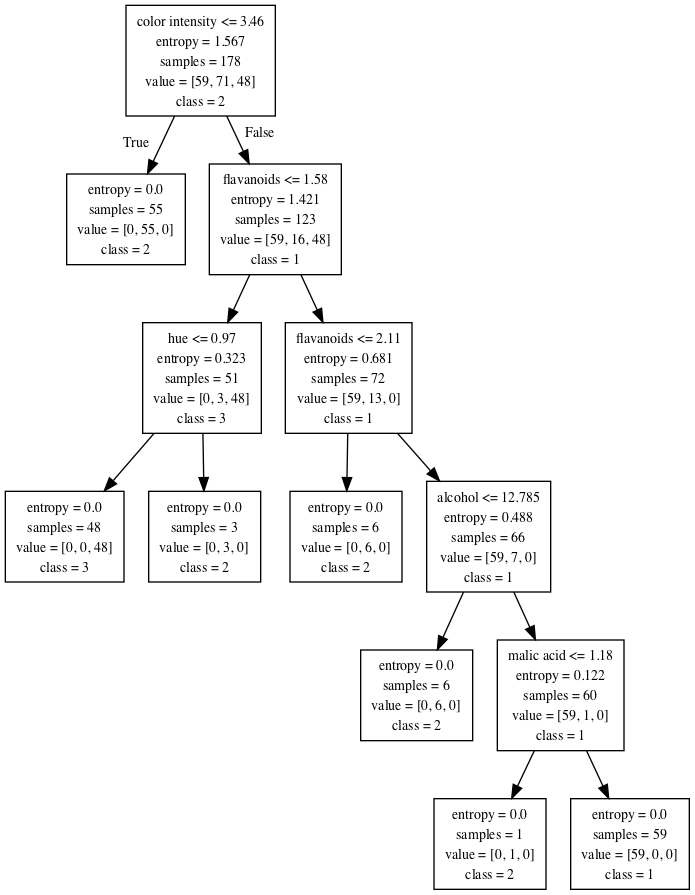

In [58]:
decision_tree_1 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=6,
    random_state = 1337
)
decision_tree_1.fit(wine_features, wine_class)

# Render our tree.
dot_data_1 = tree.export_graphviz(
    decision_tree_1, out_file=None,
    feature_names=wine_features.columns,
    class_names=['1', '2', '3'],
    filled=False
)
graph = pydotplus.graph_from_dot_data(dot_data_1)
Image(graph.create_png())

In [87]:
print('time 2:', time.time() - start_time)

time 2: 10.950441122055054


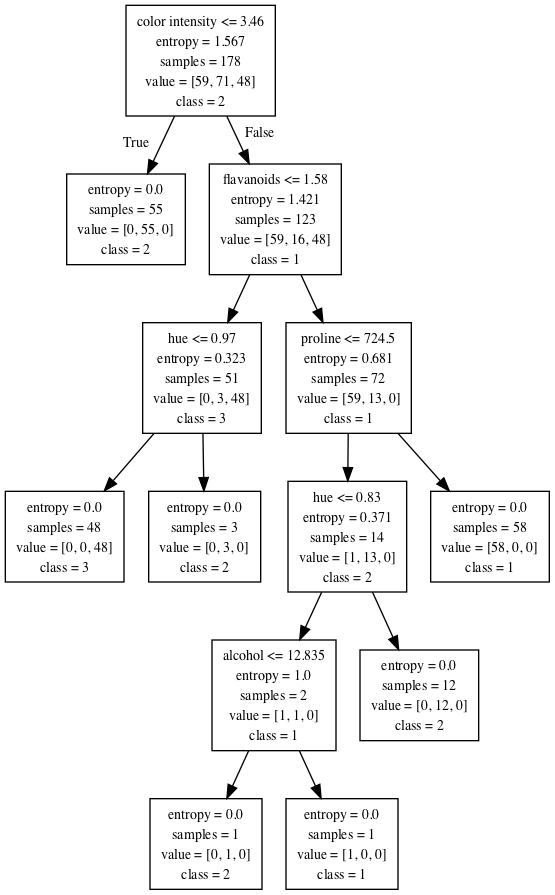

In [59]:
decision_tree_2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=7,
    random_state = 1337
)
decision_tree_2.fit(wine_features, wine_class)

# Render our tree.
dot_data_2 = tree.export_graphviz(
    decision_tree_2, out_file=None,
    feature_names=wine_features.columns,
    class_names=['1', '2', '3'],
    filled=False
)
graph = pydotplus.graph_from_dot_data(dot_data_2)
Image(graph.create_png())

In [89]:
print('time 3:', time.time() - start_time)

time 3: 52.57767605781555


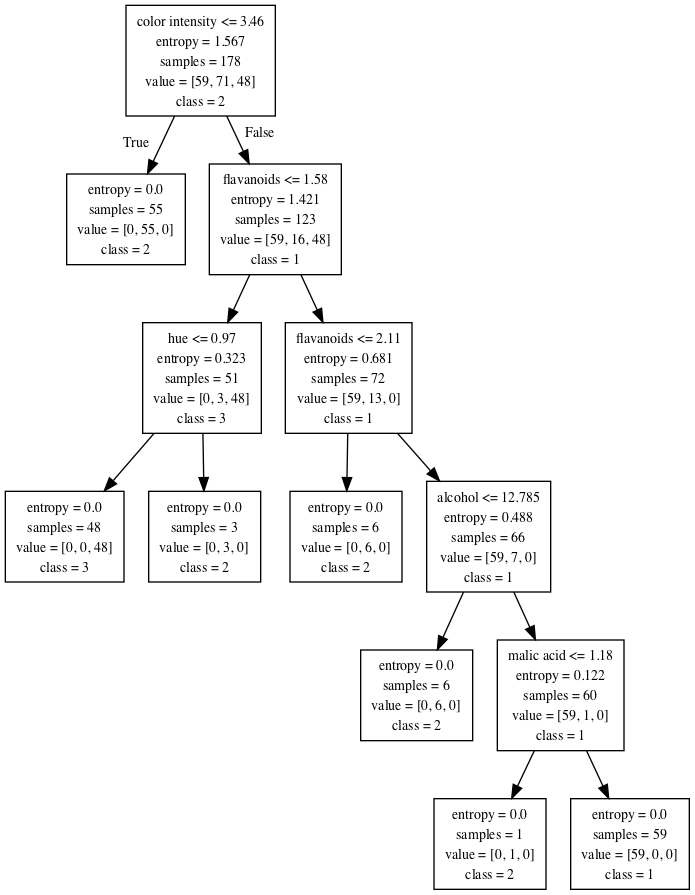

In [63]:
decision_tree_3 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=5,
    random_state = 1337
)
decision_tree_3.fit(wine_features, wine_class)

# Render our tree.
dot_data_3 = tree.export_graphviz(
    decision_tree_3, out_file=None,
    feature_names=wine_features.columns,
    class_names=['1', '2', '3'],
    filled=False
)
graph = pydotplus.graph_from_dot_data(dot_data_1)
Image(graph.create_png())

In [90]:
print('time 4:', time.time() - start_time)

time 4: 72.82878494262695


In [64]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

In [92]:
cross_val_score(rfc, wine_features, wine_class, cv=10)

array([1.        , 0.94444444, 1.        , 0.83333333, 0.94444444,
       1.        , 1.        , 0.94444444, 1.        , 1.        ])

In [96]:
print('time 5:', time.time() - start_time)

time 5: 151.65799617767334


Thought